# Disk Internal Structures

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Disk-Internal-Structures" data-toc-modified-id="Disk-Internal-Structures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Disk Internal Structures</a></span></li><li><span><a href="#x,y-plots" data-toc-modified-id="x,y-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>x,y plots</a></span></li><li><span><a href="#3D-Interactive-Visualization-with-Plotly" data-toc-modified-id="3D-Interactive-Visualization-with-Plotly-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3D Interactive Visualization with Plotly</a></span></li></ul></div>

In [1]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as c

import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Plotly's Python graphing library makes interactive, publication-quality graphs
import plotly.graph_objects as plygo

In [2]:
from pathlib import Path

# import my own classes
from galaxy.timecourse import TimeCourse
from galaxy.surfacedensity import SurfaceDensityProfile

## Disk Internal Structures

In [3]:
# import pickle
# with open("sdp.pkl","rb") as f:
#     sdp = pickle.load(f)

In [6]:
# for gal in ('M33',):
#     for snap in np.arange(0,460):
        
gal = 'MW'
snap = 801
sdp = SurfaceDensityProfile(gal, snap, ptype=2, usesql=True)
fname = f'cyl_{gal}_{snap:03}.png'
sdp.plot_r_theta_scaled(xlim=(0,100), pngout=True, fname=fname)
plt.close()

## x,y plots

/home/colin/.pyenv/versions/miniconda3-4.2.12/envs/400b/lib/python3.6/site-packages/matplotlib/collections.py:857: RuntimeWarning:

invalid value encountered in sqrt



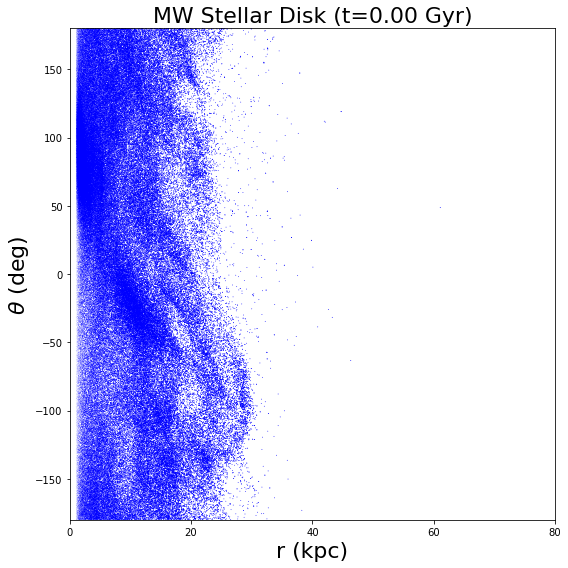

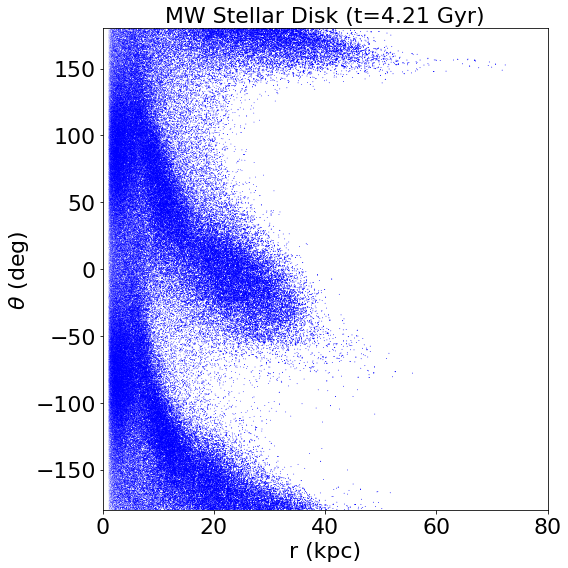

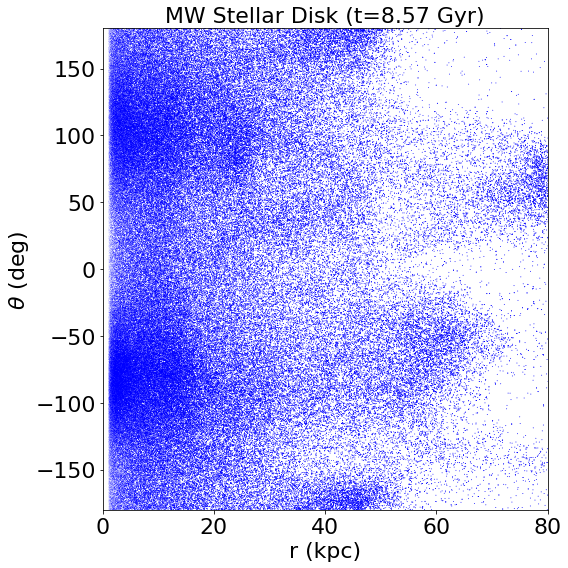

In [6]:
for gal in ('MW_000','MW_295','MW_600'):
    fname = f'cyl_{gal}.png'
    sdp[gal].plot_r_theta_scaled(xlim=(0,80), pngout=True, fname=fname)

In [44]:
def plot_xy(curr_sdp):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(curr_sdp.alg_r[0,:], curr_sdp.alg_r[1,:], ec="None", fc='b', s=0.25)

    ax.set_xlabel('x (kpc)', fontsize=22)
    ax.set_ylabel("y (kpc)", fontsize=22)
    # ax.set_aspect=1.0
    ax.set_title(f"MW Stellar Disk ($t={curr_sdp.t:.2f}$ Gyr)", fontsize=22)

    #adjust tick label font size
    label_size = 22
    rcParams['xtick.labelsize'] = label_size 
    rcParams['ytick.labelsize'] = label_size

    fig.tight_layout()

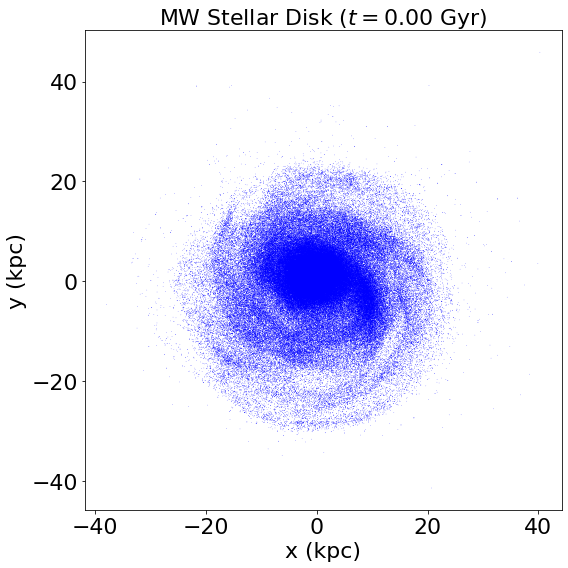

In [47]:
plot_xy(sdp['MW_000'])

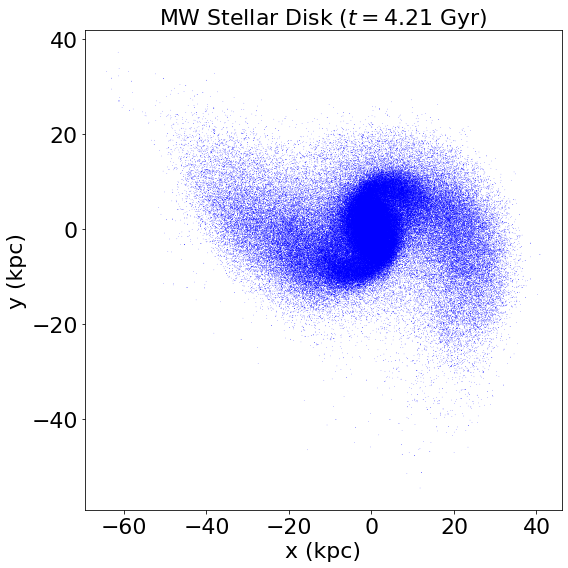

In [46]:
plot_xy(sdp['MW_295'])

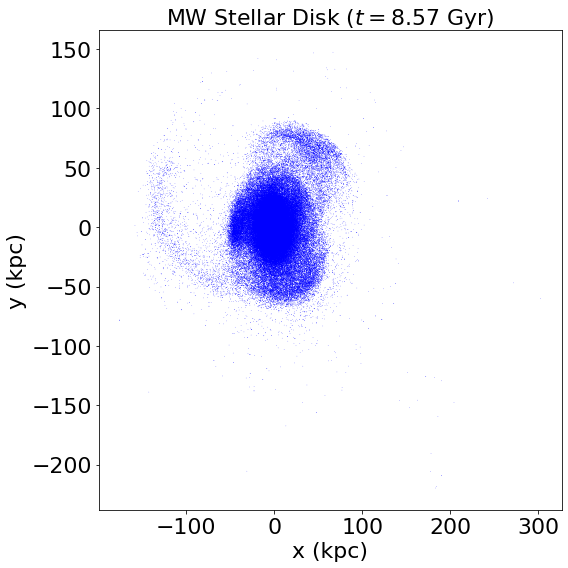

In [48]:
plot_xy(sdp['MW_600'])

A common way in PPD observations to make spirals more obvious is to plot stuff in the $(r, \theta)$ frame. Below we apply the same method.

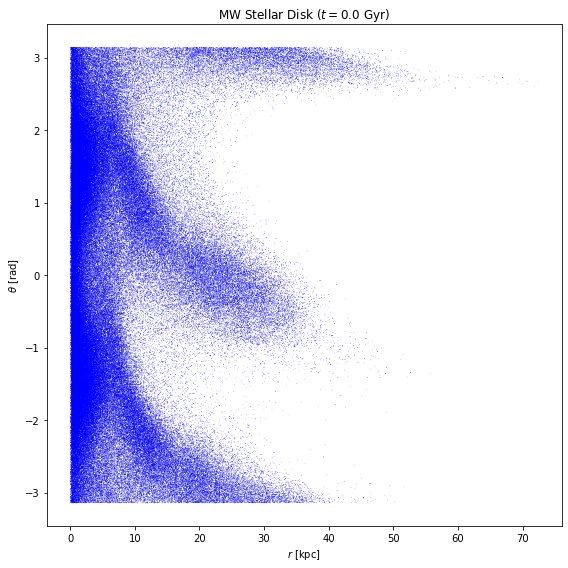

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(sdp['MW_295'].cyl_r_mag, sdp['MW_295'].cyl_theta, ec="None", fc='b', s=0.25)
ax.set(xlabel=r"$r$ [kpc]", ylabel=r"$\theta$ [rad]",
       title="MW Stellar Disk ($t={:.2f}$)".format(sdp['MW_295'].t))
fig.tight_layout()

To make the spirals stand out more, we can scale the content (point size in scatter plots, or color in colormaps) with a function of radius. Here, we scale the point size with $\ln(r^2)$. 

Combined with the picture below, you may select a desired model to fit the spirals (by overplotting on the figure or performing more calculations) to obtain, for example, the pitch angle.

In [61]:
def plot_r_theta_scaled(curr_sdp):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(curr_sdp.cyl_r_mag, curr_sdp.cyl_theta, ec="None", fc='b', 
               s=0.1*np.log(curr_sdp.cyl_r_mag**2))
    
    ax.set_xlabel('r (kpc)', fontsize=22)
    ax.set_ylabel(r"$\theta$ [rad]", fontsize=22)
    ax.set_title(f"MW Stellar Disk ($t={curr_sdp.t:.2f}$ Gyr)", fontsize=22)
#     ax.text(30, 1.5, 'point size scaled with $\ln(r^2)$', fontsize=16)

    #adjust tick label font size
    label_size = 22
    rcParams['xtick.labelsize'] = label_size 
    rcParams['ytick.labelsize'] = label_size

    fig.tight_layout()

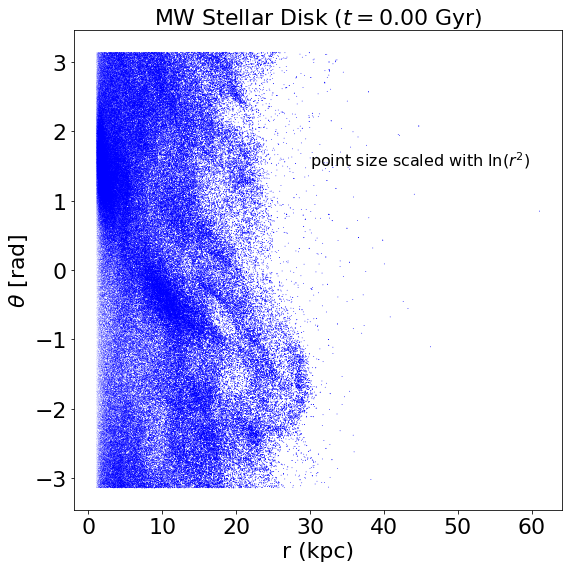

In [56]:
plot_r_theta_scaled(sdp['MW_000'])

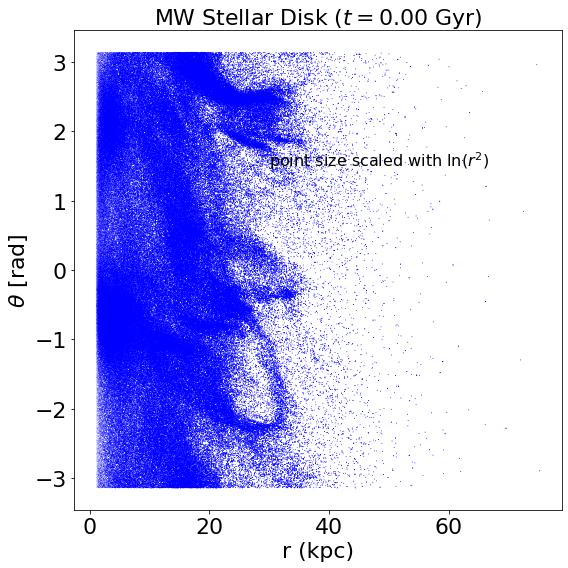

In [60]:
plot_r_theta_scaled(sdp['M31_000'])

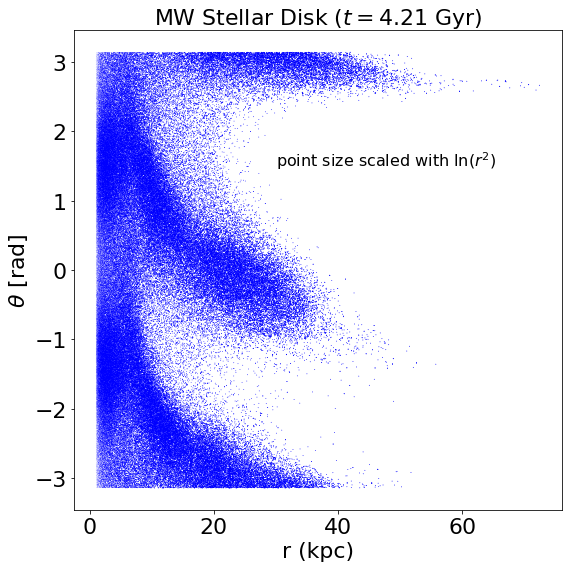

In [57]:
plot_r_theta_scaled(sdp['MW_295'])

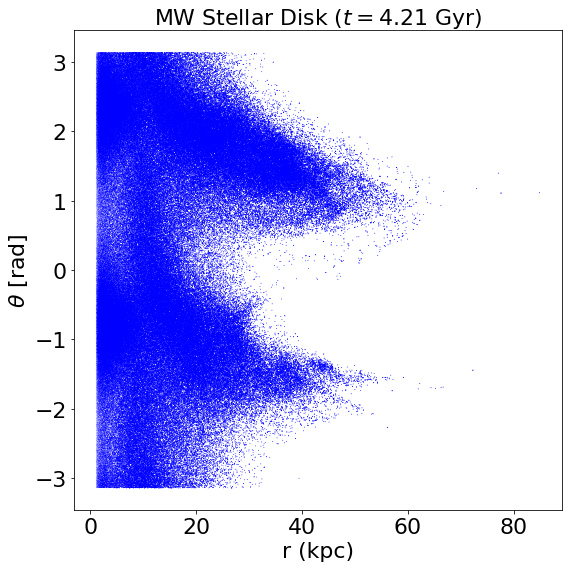

In [62]:
plot_r_theta_scaled(sdp['M31_295'])

## 3D Interactive Visualization with Plotly

If you want to visualize disk particles in 3D and see how the stellar disk looks like in different perspectives, the following cell gives you an example.

Check out their documentation for more examples: [3D Scatter Plots in Python](https://plotly.com/python/3d-scatter-plots/)

In [59]:
# layout = plygo.Layout(width=1024, height=800, autosize=False, showlegend=True, scene=dict(aspectmode='data', 
#                       xaxis_title='x/kpc', yaxis_title='y/kpc', zaxis_title='z/kpc',                                                                    
#                       camera=dict(up=dict(x=0,y=0,z=1), center=dict(x=0,y=0,z=0), eye=dict(x=-0.75,y=-1.25,z=1.5))))
# data = [plygo.Scatter3d(x=sdp['MW_295'].alg_r[0,::5], 
#                         y=sdp['MW_295'].alg_r[1,::5,], 
#                         z=sdp['MW_295'].alg_r[2,::5], 
#                         mode='markers', marker=dict(size=1, opacity=0.8, color='blue'), 
#                         name=r"Sample N_par="+str(sdp['MW_295'].alg_r[::5].shape[0]))]
# fig = plygo.Figure(data=data, layout=layout)

# # make it a tight layout
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), legend=dict(x=0.05, y=0.95, bordercolor="Black", borderwidth=2))
# fig.show(renderer='notebook')

# if you want to save the interactive visualization into a HTML file and share with others, 
# uncomment the following line
#fig.write_html("portable_visualization.html")